# Capitulo 2
### Funciones Kernels y KPCA

los **kernels** son funciones matemáticas que nos ayudan a mandar unos datos de una dimension a dimensiones mas altas.
si tengo unos datos muy complejos y no puedo clasificarlos con lineas peuso usar kernels para hacer una mejor clasificacion.

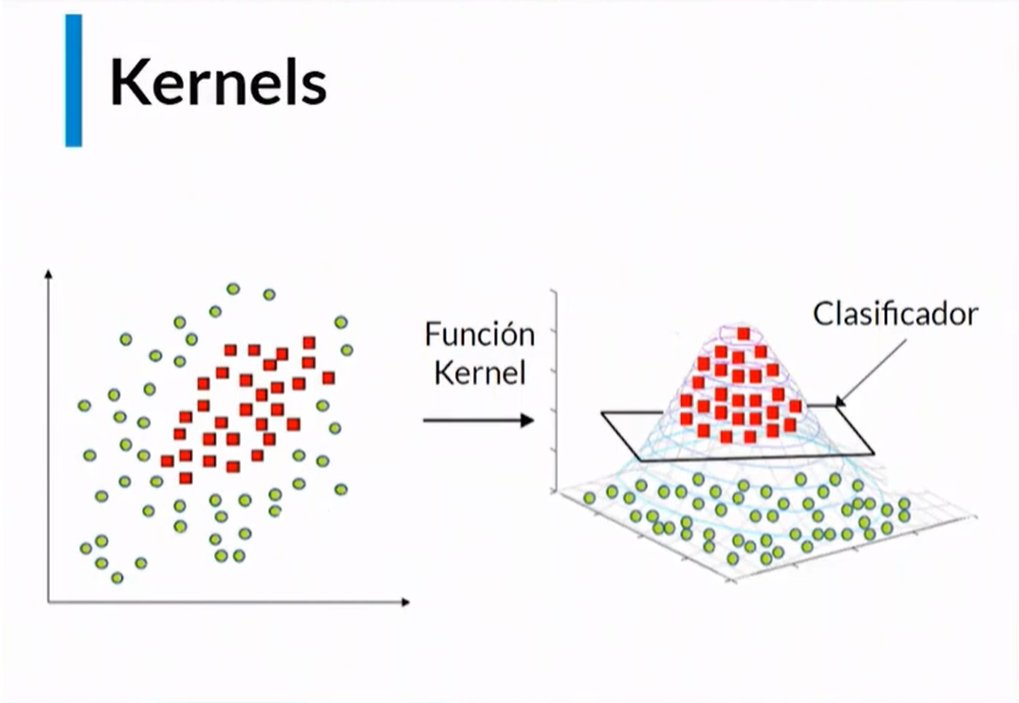

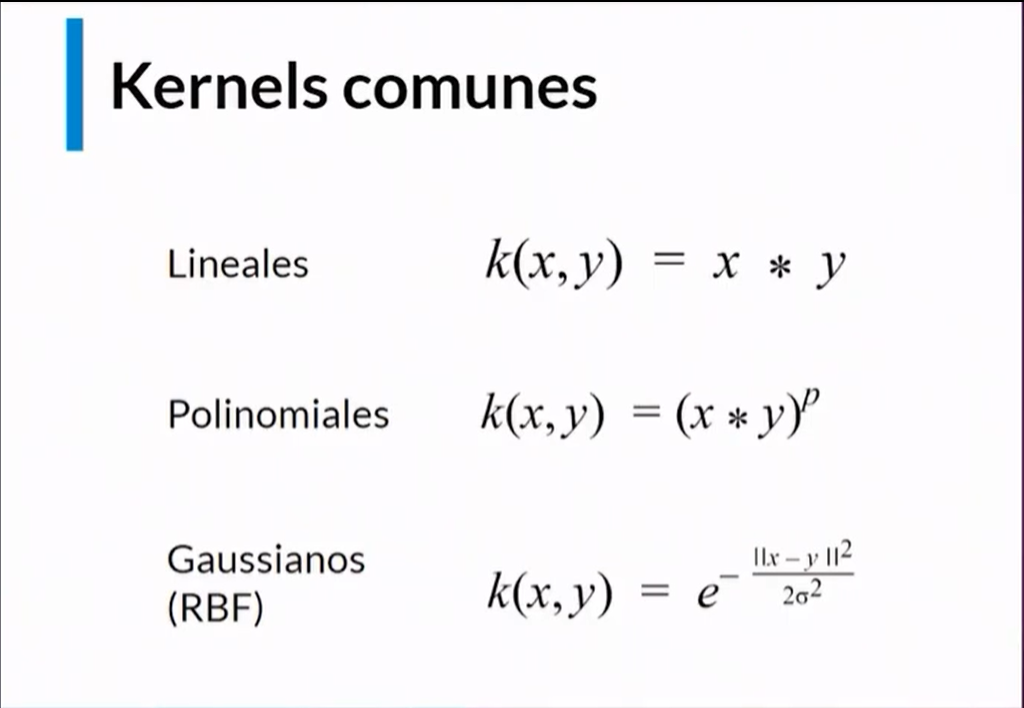

### importando paquetes 

In [2]:
import pandas as pd
import sklearn 
import matplotlib.pyplot as plt

from sklearn.decomposition import KernelPCA

from sklearn.linear_model import LogisticRegression

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [5]:
if __name__ == "__main__":
    dt_heart = pd.read_csv('heart.csv')

    print(dt_heart.head(5))

    dt_features  = dt_heart.drop(['target'], axis=1)
    dt_target = dt_heart['target']

    dt_features = StandardScaler().fit_transform(dt_features)

    X_train, X_test, y_train, y_test = train_test_split(dt_features, dt_target, test_size=0.3, random_state=42)
    
    #asignando la variable kpca
    kpca = KernelPCA(n_components=4, kernel='poly')#vamos a implementar el kernel, los componentes son opcionles
    #En este caso vamos a usar 4 componentes
    ## el kernel va a ser 'poly' es decir polinomial 
    # se puede implementar un kernel lineal usando kernel = 'linear'
    # se puede implementar un kernel gauseano usando kernel = 'rbf'
    # la unica opcion diferente a pcs normal es que lleva la opcion kernel
    
    kpca.fit(X_train)#ajustamos los datos de entrenamiento usando la funcion fit 

    dt_train = kpca.transform(X_train) #es en ultimas la fuincion que nos 
    #va a devolver el valor 
    dt_test = kpca.transform(X_test)

    # aqui aplicamos de nuevo nuestra regresion logistica con nuestros datos 
    #una vez hemos reducido su domencionalidad
    logistic = LogisticRegression(solver='lbfgs') # aqui aplicamos nuestra regresion logistica 

    logistic.fit(dt_train, y_train) #mandamos nuestros features de entrenamiento y nuestros targets de entrenamiento
    
    print("SCORE KPCA: ", logistic.score(dt_test, y_test)) # Imprimimos nuestro score en pantalla vamos a calcular el accuracy del modelo

    #kernels_y_kpca

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  
SCORE KPCA:  0.7987012987012987
